# Übungsblatt 6 #

### Alice Ziegler, Daniel Schneider ###

## Aufgabe 6.1: Dichteschätzer ##

#### Generieren der Log-normalverteilten Daten ####

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
mu = 0
sigma = 1
N = 1000

In [3]:
rand = [None]*N
for i in range(N):
    rand[i] = random.lognormvariate(mu,sigma)

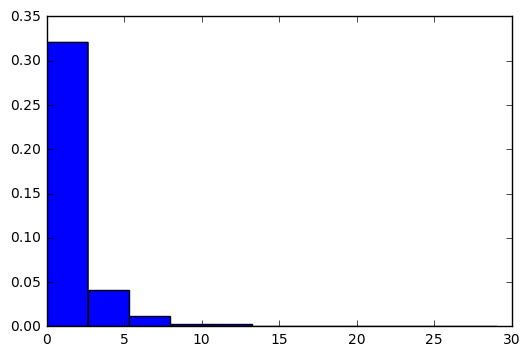

In [4]:
bins = math.ceil(math.log2(len(rand))) + 1
plt.hist(rand,bins=bins,normed=True)
plt.show()

#### Funktionen zum Ermitteln des Fehlers ####

In [5]:
def logNorm(x,mu,sigma):
    return (1 / (sigma*x*math.sqrt(2*math.pi)) * math.exp(-((math.log(x)-mu)**2 / 2*sigma**2)))

In [6]:
pOrig = [None]*N

for i in range(N):
    pOrig[i] = logNorm(rand[i], mu, sigma)

In [7]:
def squareError(tLearned,tOrig):
    err = 0.5*np.sum(np.square(np.array(tLearned)-np.array(tOrig)))
    return(err)

### a) kNN-Dichteschätzer ###

In [8]:
def kNN(data,k,x):
    
    N = len(data)
    
    if k>=N:
        k = N - 1
    
    dist = distances(x,data)
    dist = sorted(dist)
    #print(dist)
    
    V = 2*dist[k]
    
    p = k/(N*V)
    return (p)

In [9]:
def distances(x,data):
    N = len(data)
    
    dist = [None]*N
    for i in range(N):
        dist[i] = abs(x - data[i])
    
    return dist

#### Fehler ####

In [10]:
ks = np.round(np.logspace(0.1,3.0,20))

In [11]:
#for k in range(10,1000,50):
for k in ks:
    k = int(k)
    pKNN = [None]*N
    for i in range(N):
        pKNN[i] = kNN(rand,k,rand[i])
    
    print("k: "+str(k)+", Error: "+str(squareError(pKNN,pOrig)))

k: 1, Error: 69873.6513197
k: 2, Error: 1127.95424415
k: 3, Error: 137.485805098
k: 4, Error: 71.0848808295
k: 5, Error: 51.7494286407
k: 7, Error: 20.7843493596
k: 10, Error: 10.8882148677
k: 15, Error: 7.79700137513
k: 21, Error: 6.05607181383
k: 30, Error: 2.52989500418
k: 42, Error: 1.01271402993
k: 60, Error: 0.726408347778
k: 85, Error: 0.479839096235
k: 121, Error: 0.335428275888
k: 173, Error: 0.417278073611
k: 245, Error: 1.00547277493
k: 348, Error: 2.80254381197
k: 495, Error: 7.98243924602
k: 704, Error: 21.6816966289
k: 1000, Error: 82.7963641825


#### Plot ####

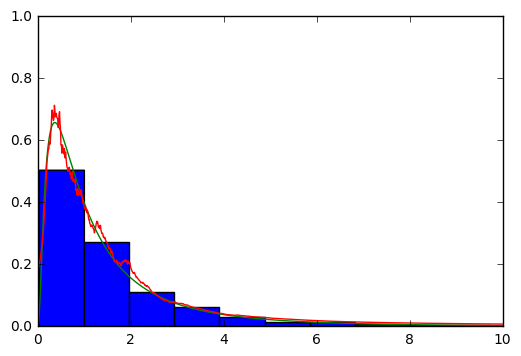

In [12]:
k=100

plt.hist(rand,bins=30,normed=True)
xs = np.arange(0.01, 10.0, 0.01)
ys1 = [None]*xs.shape[0]
ys2 = [None]*xs.shape[0]
for i in range (xs.shape[0]):
    ys1[i] = logNorm(xs[i],mu,sigma)
    ys2[i] = kNN(rand,k,xs[i])

plt.plot(xs,ys1)
#plt.subplot(ncols=2,nrows=1)
plt.plot(xs,ys2)

plt.axis([0,10,0,1])
plt.show()

### b) Kerndichteschätzer ###

In [103]:
def kernel(data,h,x):
    N = len(data)
    V = h
    
    k=0
    for i in range(N):
        k += K((x-data[i])/h)
    
    p = k/(N*V)
    return (p)

In [14]:
def K(u):
    return (1 if abs(u) <= 0.5 else 0)

#### Fehler ####

In [15]:
hs = np.logspace(-1,1.0,20)

In [16]:
#for h in np.arange(0.1,5.,0.5):
for h in hs:
    pKernel = [None]*N
    for i in range(N):
        pKernel[i] = kernel(rand,h,rand[i])
        
    print("h: "+str(h)+", Error: "+str(squareError(pKernel,pOrig)))

h: 0.1, Error: 0.956195499943
h: 0.12742749857, Error: 0.81087284867
h: 0.162377673919, Error: 0.643476656605
h: 0.206913808111, Error: 0.505120129728
h: 0.263665089873, Error: 0.393283789904
h: 0.335981828628, Error: 0.4119359827
h: 0.428133239872, Error: 0.609477679032
h: 0.545559478117, Error: 1.1642534408
h: 0.695192796178, Error: 2.26491210047
h: 0.88586679041, Error: 4.0738061296
h: 1.12883789168, Error: 6.6701735738
h: 1.43844988829, Error: 10.1260922809
h: 1.83298071083, Error: 14.4712890669
h: 2.33572146909, Error: 19.5294113283
h: 2.97635144163, Error: 25.4232441563
h: 3.79269019073, Error: 31.8853155743
h: 4.83293023857, Error: 38.9565768491
h: 6.15848211066, Error: 45.9258838141
h: 7.84759970351, Error: 52.5439978132
h: 10.0, Error: 58.7722100852


#### Plot ####

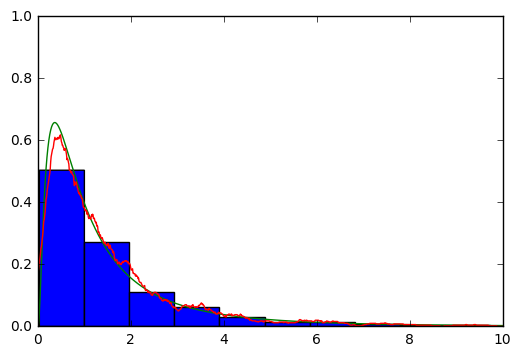

In [17]:
h=0.5

plt.hist(rand,bins=30,normed=True)
xs = np.arange(0.01, 10.0, 0.01)
ys1 = [None]*xs.shape[0]
ys2 = [None]*xs.shape[0]
for i in range (xs.shape[0]):
    ys1[i] = logNorm(xs[i],mu,sigma)
    ys2[i] = kernel(rand,h,xs[i])
plt.plot(xs,ys1)
plt.plot(xs,ys2)

plt.axis([0,10,0,1])
plt.show()

## Aufgabe 6.2: Naive Bayes ##

In [18]:
import pandas as pd

In [19]:
data = pd.read_csv("crx.data",header=None,na_values=["?"])

In [20]:
data.dropna(inplace=True)

In [21]:
catIndexes = [0,3,4,5,6,8,9,11,12,15]

for i in catIndexes:
    data[i] = data[i].astype(dtype="category")

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
0     653 non-null category
1     653 non-null float64
2     653 non-null float64
3     653 non-null category
4     653 non-null category
5     653 non-null category
6     653 non-null category
7     653 non-null float64
8     653 non-null category
9     653 non-null category
10    653 non-null int64
11    653 non-null category
12    653 non-null category
13    653 non-null float64
14    653 non-null int64
15    653 non-null category
dtypes: category(10), float64(4), int64(2)
memory usage: 42.4 KB


In [23]:
def metadata(data):
    types = data.dtypes
    columns = data.columns
    
    return types,columns

In [24]:
dtypes, colNames = metadata(data)

In [85]:
testing = data.sample(int(data.shape[0]/4),)
training = data.drop(testing.index)

In [86]:
testing.reset_index(drop=True,inplace=True)
training.reset_index(drop=True,inplace=True)

In [27]:
def groupByClasses(data,classAttribute):
    cats = data[classAttribute].cat.categories
    
    dataClass = [None]*len(cats)
    
    for i in range(0,len(cats)):
        dataClass[i] = data.loc[data[classAttribute] == cats[i]]
    
    return(dataClass)

In [28]:
testingClasses = groupByClasses(testing,15)

In [29]:
trainingClasses = groupByClasses(training,15)

In [30]:
def pClasses(dataClasses):
    numOfValues = 0
    for i in range(len(dataClasses)):
        numOfValues += dataClasses[i].shape[0]
    
    ps = [None]*len(dataClasses)
    for i in range(len(dataClasses)):
        ps[i] = dataClasses[i].shape[0] / numOfValues
    
    return ps

In [226]:
def pXgivenClassNominal(column, x):
    #cats = column.cat.categories
    count = len(column)
    countX = len(column[column == x])
    
    p = countX/count
    return p

In [225]:
def pXgivenClassNumeric(column,x,h=10):
    return (kernel(column, h, x))
    #return kNN(column,k,x)

In [276]:
def pXrowGivenClasses(dataClasses,dtypes,kernelH,xRow):
    
    ps = [None]*len(dataClasses)
    for i in range(len(dataClasses)):
        dat = dataClasses[i]
        
        pXgivenC = 1
        for j in range(dat.shape[1]):
            if(dtypes[j].name == "category"):
                p = pXgivenClassNominal(dat[j],xRow[j])
                pXgivenC *= p
                
                #if(p == 0):
                #    print(str(j)+","+str(xRow[j]))
                    
            else:
                p = pXgivenClassNumeric(dat[j],xRow[j],kernelH[j])
                pXgivenC *= p
                
                #if(p == 0):
                #    print(str(j)+","+str(xRow[j]))
            
        ps[i] = pXgivenC
        
    return ps

In [277]:
def pClassGivenX(dataClasses,dtypes,kernelH,classID,xRow):
    
    pCs = pClasses(dataClasses)
    pXgivenCs = pXrowGivenClasses(dataClasses,dtypes,kernelH,xRow)
    
    zaehler = pCs[classID] * pXgivenCs[classID]
    nenner = 0
    for k in range (len(dataClasses)):
        nenner += pCs[k] * pXgivenCs[k]
    
    p = zaehler/nenner
    
    return p

In [280]:
def naiveBayes(training, testing, classAttribute):
    
    trainingClasses = groupByClasses(training,classAttribute)
    
    C = [None]*len(trainingClasses)
    for k in range(len(trainingClasses)):
        C[k] = trainingClasses[k].iloc[0,classAttribute]
        trainingClasses[k] = trainingClasses[k].drop(classAttribute, axis=1)
        trainingClasses[k].reset_index(drop=True,inplace=True)
        
    testingNoClass = testing.drop(classAttribute, axis=1)
    
    dtypes, colNames = metadata(training)
    
    #calculate h for Kernel
    tmp = pd.concat([training,testing],axis=0,ignore_index=True)
    h = [None] * tmp.shape[1]
    for j in range(tmp.shape[1]):
        if dtypes[j].name != 'category':
            sorted = tmp[j].sort_values(ascending=False)

            diff = sorted.diff(-1).sort_values(ascending=False)
            diff.reset_index(drop=True, inplace=True)
            h[j] = (diff[0] + diff[1])
    #print(h)
    
    estimatedClass = [None]*testingNoClass.shape[0]
    
    for i in range(testingNoClass.shape[0]):
        #print(str(testingNoClass.iloc[i].tolist()))
        for k in range(len(trainingClasses)):
            p = pClassGivenX(trainingClasses,dtypes,h,k,testingNoClass.iloc[i])
            
            #print(p)
            if p > 0.5:
                estimatedClass[i] = C[k]
                
        #print("=>"+str(estimatedClass[i]))
        #print("p("+str(C[1])+" | "+str(testingNoClass.iloc[i].tolist())+")="+str(p))
    return estimatedClass

In [279]:
calcClasses = naiveBayes(training, testing, 15)

[None, 6.25, 4.4600000000000009, None, None, None, None, 10.5, None, None, 44.0, None, None, 1160.0, 67615.0, None]


In [289]:
def errors(orig, generated):
    err = 0
    for h in range(len(orig)):
        if orig[h] != generated[h]:
            err += 1
            
    return err

In [290]:
errors(testing[15].tolist(),calcClasses)

27

## Aufgabe 6.3: Maximum-Likelihood ##

### a) $k$-Nearest-Neighbors ###

### b) Testen des Algorithmus ###

### c) Klassifizierer mit Greedy-Ansatz ###